<a href="https://colab.research.google.com/github/nimalan-parameswaran/Healthcare-Patient-Risk-Analysis-Task1/blob/main/Healthcare_Patient_Risk_Analysis_novinitix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [4]:
data = pd.read_csv("/content/healthcare_dataset.csv")

In [5]:
data.shape

(55500, 15)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [7]:
data.head(1)

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal


In [8]:
data.isnull().sum()

,0
Name,0
Age,0
Gender,0
Blood Type,0
Medical Condition,0
Date of Admission,0
Doctor,0
Hospital,0
Insurance Provider,0
Billing Amount,0


In [9]:
data.nunique()

,0
Name,49992
Age,77
Gender,2
Blood Type,8
Medical Condition,6
Date of Admission,1827
Doctor,40341
Hospital,39876
Insurance Provider,5
Billing Amount,50000


In [10]:
data.describe()

,Age,Billing Amount,Room Number
count,55500.000000,55500.000000,55500.000000
mean,51.539459,25539.316097,301.134829
std,19.602454,14211.454431,115.243069
min,13.000000,-2008.492140,101.000000
25%,35.000000,13241.224652,202.000000
50%,52.000000,25538.069376,302.000000
75%,68.000000,37820.508436,401.000000
max,89.000000,52764.276736,500.000000


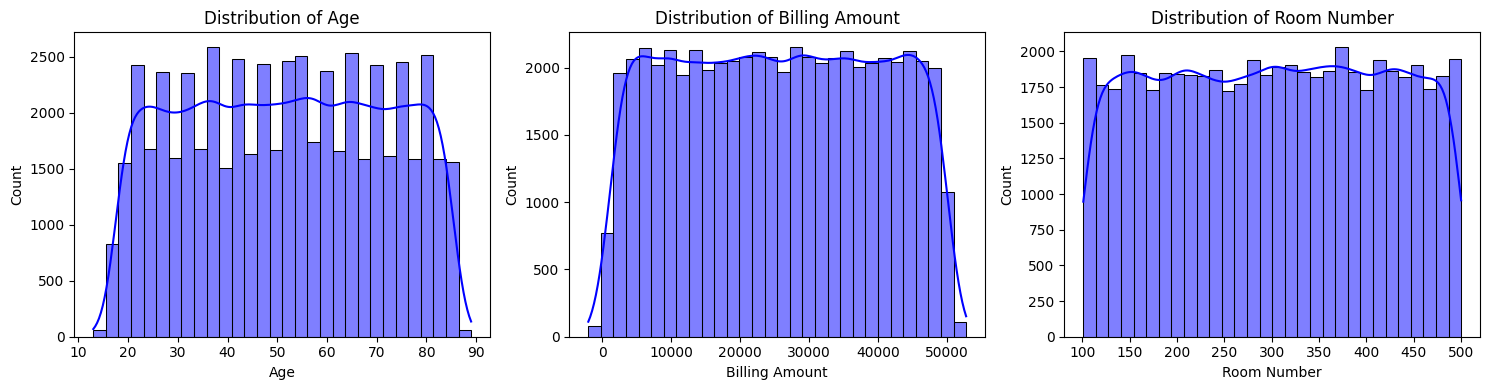

In [11]:
plt.figure(figsize=(15, 4))

# Age distribution
plt.subplot(1, 3, 1)
sns.histplot(data["Age"], kde=True, bins=30, color="blue")
plt.title("Distribution of Age")

# Billing Amount distribution
plt.subplot(1, 3, 2)
sns.histplot(data["Billing Amount"], kde=True, bins=30, color="blue")
plt.title("Distribution of Billing Amount")

# Room Number distribution
plt.subplot(1, 3, 3)
sns.histplot(data["Room Number"], kde=True, bins=30, color="blue")
plt.title("Distribution of Room Number")

plt.tight_layout()
plt.show()

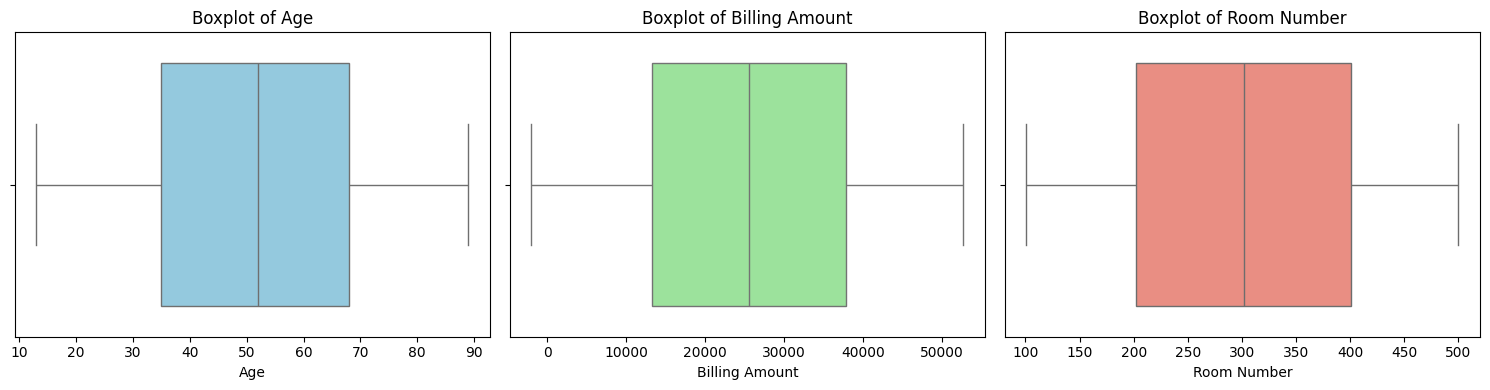

In [12]:
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
sns.boxplot(x=data["Age"], color="skyblue")
plt.title("Boxplot of Age")

plt.subplot(1, 3, 2)
sns.boxplot(x=data["Billing Amount"], color="lightgreen")
plt.title("Boxplot of Billing Amount")

plt.subplot(1, 3, 3)
sns.boxplot(x=data["Room Number"], color="salmon")
plt.title("Boxplot of Room Number")

plt.tight_layout()
plt.show()

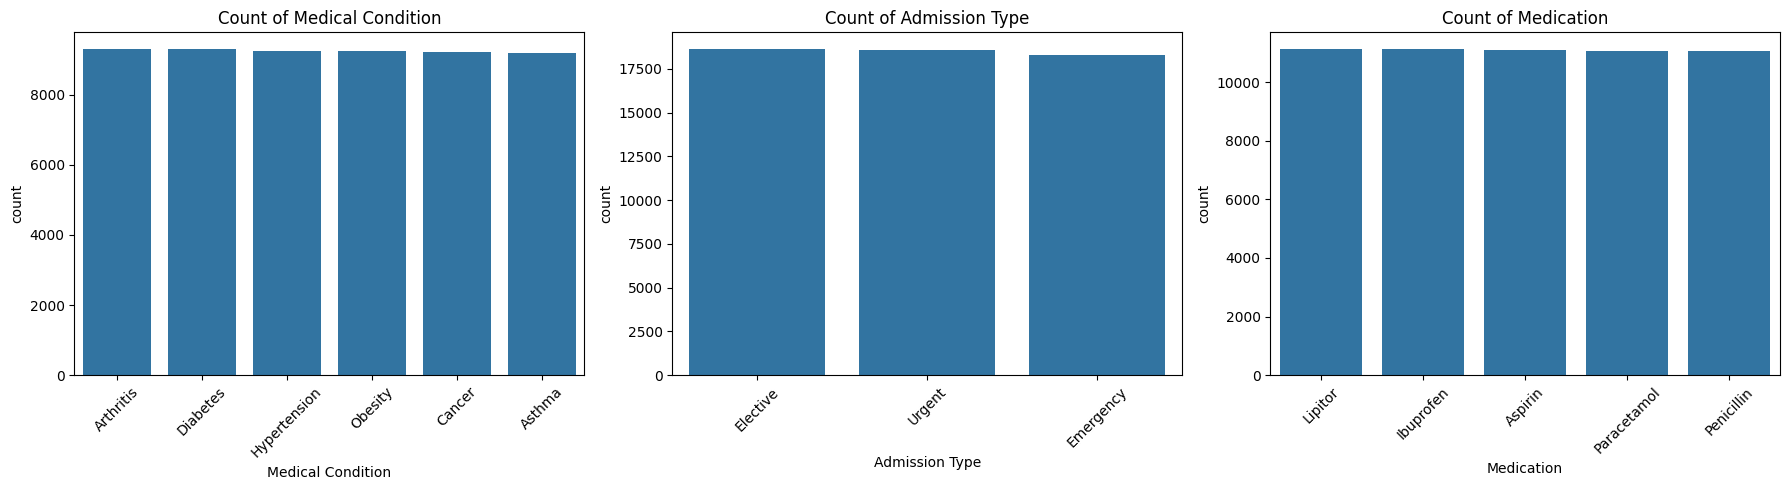

In [13]:
categorical_cols = ["Medical Condition", "Admission Type", "Medication"]

plt.figure(figsize=(18, 5))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(1, len(categorical_cols), i)
    sns.countplot(data=data, x=col, order=data[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f"Count of {col}")
    plt.tight_layout()

plt.show()

In [14]:
data.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [15]:
data['Medication'].unique()

array(['Paracetamol', 'Ibuprofen', 'Aspirin', 'Penicillin', 'Lipitor'],
      dtype=object)

In [16]:
data['Medical Condition'].unique()

array(['Cancer', 'Obesity', 'Diabetes', 'Asthma', 'Hypertension',
       'Arthritis'], dtype=object)

In [17]:
data['Test Results'].unique()

array(['Normal', 'Inconclusive', 'Abnormal'], dtype=object)

In [18]:
data.columns.tolist()

['Name',
 'Age',
 'Gender',
 'Blood Type',
 'Medical Condition',
 'Date of Admission',
 'Doctor',
 'Hospital',
 'Insurance Provider',
 'Billing Amount',
 'Room Number',
 'Admission Type',
 'Discharge Date',
 'Medication',
 'Test Results']

In [19]:
data.select_dtypes(include=["object"]).columns.tolist()

['Name',
 'Gender',
 'Blood Type',
 'Medical Condition',
 'Date of Admission',
 'Doctor',
 'Hospital',
 'Insurance Provider',
 'Admission Type',
 'Discharge Date',
 'Medication',
 'Test Results']

In [20]:
data.columns.tolist()

['Name',
 'Age',
 'Gender',
 'Blood Type',
 'Medical Condition',
 'Date of Admission',
 'Doctor',
 'Hospital',
 'Insurance Provider',
 'Billing Amount',
 'Room Number',
 'Admission Type',
 'Discharge Date',
 'Medication',
 'Test Results']

In [21]:
df = data.copy()

df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])
df['Stay_Days'] = (df['Discharge Date'] - df['Date of Admission']).dt.days
df['Admission_Month'] = df['Date of Admission'].dt.month
df['Age_Group'] = pd.cut(df['Age'], bins=[0,20,40,60,100], labels=False)
df['Cost_Level'] = pd.qcut(df['Billing Amount'], q=4, labels=False)

# Remove irrelevant/raw columns
df = df.drop([
    'Name', 'Doctor', 'Hospital', 'Insurance Provider',
    'Room Number', 'Date of Admission', 'Discharge Date',
    'Age', 'Billing Amount'
], axis=1)

# Encode target
le = LabelEncoder()
df['Test Results'] = le.fit_transform(df['Test Results'])

# One-hot encode nominal features
one_hot_cols = [
    'Gender',
    'Blood Type',
    'Medical Condition',
    'Admission Type',
    'Medication'
]

df = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)

In [22]:
df.shape

(55500, 24)

In [23]:
df.head()

,Test Results,Stay_Days,Admission_Month,Age_Group,Cost_Level,Gender_Male,Blood Type_A-,Blood Type_AB+,Blood Type_AB-,Blood Type_B+,...,Medical Condition_Cancer,Medical Condition_Diabetes,Medical Condition_Hypertension,Medical Condition_Obesity,Admission Type_Emergency,Admission Type_Urgent,Medication_Ibuprofen,Medication_Lipitor,Medication_Paracetamol,Medication_Penicillin
0,2,2,1,1,1,True,False,False,False,False,...,True,False,False,False,False,True,False,False,True,False
1,1,6,8,3,2,True,False,False,False,False,...,False,False,False,True,True,False,True,False,False,False
2,2,15,9,3,2,False,True,False,False,False,...,False,False,False,True,True,False,False,False,False,False
3,0,30,11,1,3,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,False
4,0,20,9,2,1,False,False,True,False,False,...,True,False,False,False,False,True,False,False,False,True


In [24]:
df.nunique()

,0
Test Results,3
Stay_Days,30
Admission_Month,12
Age_Group,4
Cost_Level,4
Gender_Male,2
Blood Type_A-,2
Blood Type_AB+,2
Blood Type_AB-,2
Blood Type_B+,2


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   Test Results                    55500 non-null  int64
 1   Stay_Days                       55500 non-null  int64
 2   Admission_Month                 55500 non-null  int32
 3   Age_Group                       55500 non-null  int64
 4   Cost_Level                      55500 non-null  int64
 5   Gender_Male                     55500 non-null  bool 
 6   Blood Type_A-                   55500 non-null  bool 
 7   Blood Type_AB+                  55500 non-null  bool 
 8   Blood Type_AB-                  55500 non-null  bool 
 9   Blood Type_B+                   55500 non-null  bool 
 10  Blood Type_B-                   55500 non-null  bool 
 11  Blood Type_O+                   55500 non-null  bool 
 12  Blood Type_O-                   55500 non-null  bool 
 13  M

In [26]:
from sklearn.model_selection import train_test_split

X = df.drop('Test Results', axis=1)
y = df['Test Results']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [27]:
#Logistic Regression

log_model = LogisticRegression(max_iter=2000)

log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("F1-score:", f1_score(y_test, y_pred, average='macro'))

Accuracy: 0.33297297297297296
Precision: 0.3326024466901418
Recall: 0.3323558261081258
F1-score: 0.32457041044114776


In [28]:
#Support Vector Machine (SVM)

svc_model = SVC(kernel='rbf')

svc_model.fit(X_train, y_train)
y_pred = svc_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("F1-score:", f1_score(y_test, y_pred, average='macro'))

Accuracy: 0.334954954954955
Precision: 0.3354591718451964
Recall: 0.3343426630944259
F1-score: 0.3259161685276521


In [29]:
#KNN K-Nearest Neighbors

knn_model = KNeighborsClassifier(n_neighbors=5)

knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("F1-score:", f1_score(y_test, y_pred, average='macro'))


Accuracy: 0.36495495495495495
Precision: 0.36703120867705913
Recall: 0.3646688123323716
F1-score: 0.3585864936515302


In [30]:
#XGBoost

xgb_model = XGBClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("F1-score:", f1_score(y_test, y_pred, average='macro'))

Accuracy: 0.3637837837837838
Precision: 0.3641771048310835
Recall: 0.36372133896214826
F1-score: 0.3637080750490285


In [31]:
#Random Forest

rf_model = RandomForestClassifier(
    n_estimators=1000,
    max_depth=14,
    min_samples_split=8,
    min_samples_leaf=4,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("F1-score:", f1_score(y_test, y_pred, average='macro'))

Accuracy: 0.41
Precision: 0.4099123583595743
Recall: 0.4099287133570784
F1-score: 0.4098158548316993


In [32]:
import joblib

# Save with compression
joblib.dump(rf_model, "random_forest_model.joblib", compress=('xz', 9))

['random_forest_model.joblib']

In [ ]:
from google.colab import files

# Download the compressed joblib file
files.download("random_forest_model.joblib")

In [35]:
comparison_df = pd.DataFrame({
    "Actual": y_test.reset_index(drop=True),
    "Predicted": pd.Series(y_pred)
})

comparison_df.head(10)

,Actual,Predicted
0,1,2
1,2,1
2,1,1
3,2,2
4,1,2
5,1,1
6,0,0
7,0,1
8,1,0
9,1,0


In [36]:
data_an = data.copy()
billing = data_an[["Billing Amount"]]

In [37]:
from sklearn.ensemble import IsolationForest
iso = IsolationForest(
    contamination=0.02,
    random_state=42
)

data_an["anomaly_flag"] = iso.fit_predict(billing)

In [38]:
anomalies = data_an[data_an["anomaly_flag"] == -1]
normals = data_an[data_an["anomaly_flag"] == 1]

print("Total anomalies detected:", len(anomalies))
anomalies.head()

Total anomalies detected: 1110


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,anomaly_flag
8,JASmINe aGuIlaR,82,Male,AB+,Asthma,2020-07-01,Daniel Ferguson,Sons Rich and,Cigna,50119.222792,316,Elective,2020-07-14,Aspirin,Abnormal,-1
20,tIMOTHY burNs,67,Female,A-,Asthma,2023-06-28,Krista Smith,Jones LLC,Blue Cross,42.514589,115,Elective,2023-07-02,Aspirin,Normal,-1
40,chRiSTOPHer LEe,74,Female,B-,Hypertension,2021-09-15,William Reynolds,PLC Young,Cigna,49943.278499,478,Emergency,2021-10-05,Lipitor,Normal,-1
123,DR. LaUreN ClaRk DDs,19,Male,B+,Cancer,2020-10-26,Brian Wagner,PLC Jimenez,UnitedHealthcare,49833.707718,302,Elective,2020-11-17,Lipitor,Inconclusive,-1
132,ashLEy ERIcKSoN,32,Female,AB-,Cancer,2019-11-05,Gerald Hooper,"and Johnson Moore, Branch",Aetna,-502.507813,376,Urgent,2019-11-23,Penicillin,Normal,-1


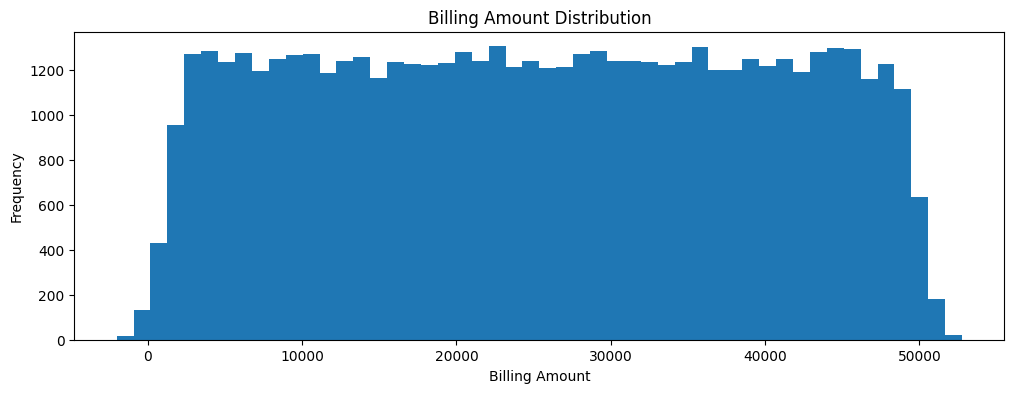

In [39]:
plt.figure(figsize=(12,4))
plt.hist(data["Billing Amount"], bins=50)
plt.xlabel("Billing Amount")
plt.ylabel("Frequency")
plt.title("Billing Amount Distribution")
plt.show()

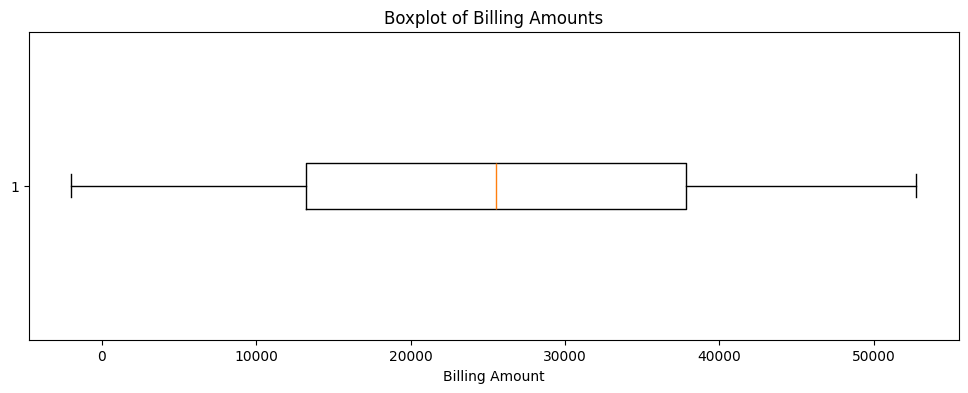

In [40]:
plt.figure(figsize=(12,4))
plt.boxplot(data["Billing Amount"], vert=False)
plt.xlabel("Billing Amount")
plt.title("Boxplot of Billing Amounts")
plt.show()

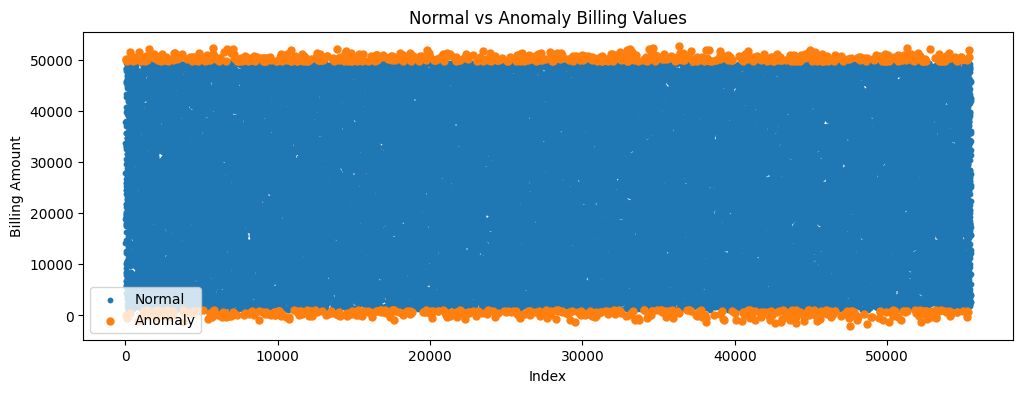

In [41]:
plt.figure(figsize=(12,4))
plt.scatter(
    normals.index,
    normals["Billing Amount"],
    label="Normal",
    s=10
)

plt.scatter(
    anomalies.index,
    anomalies["Billing Amount"],
    label="Anomaly",
    s=25
)

plt.xlabel("Index")
plt.ylabel("Billing Amount")
plt.title("Normal vs Anomaly Billing Values")
plt.legend()
plt.show()

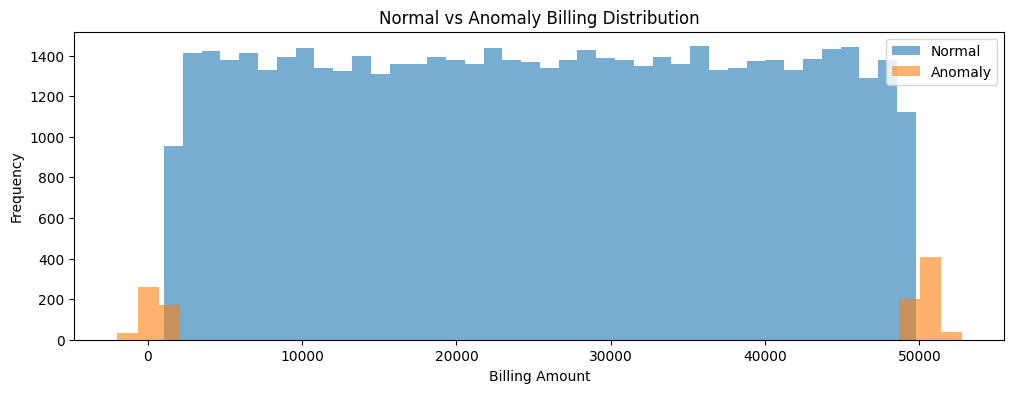

In [42]:
plt.figure(figsize=(12,4))

plt.hist(normals["Billing Amount"], bins=40, alpha=0.6, label="Normal")
plt.hist(anomalies["Billing Amount"], bins=40, alpha=0.6, label="Anomaly")

plt.xlabel("Billing Amount")
plt.ylabel("Frequency")
plt.title("Normal vs Anomaly Billing Distribution")
plt.legend()
plt.show()


In [43]:
anomaly_count = (data_an["anomaly_flag"] == -1).sum()
normal_count = (data_an["anomaly_flag"] == 1).sum()
pd.DataFrame({
    "Category": ["Normal", "Anomaly"],
    "Count": [normal_count, anomaly_count]
})

,Category,Count
0,Normal,54390
1,Anomaly,1110


In [44]:
high_anomaly = anomalies[anomalies["Billing Amount"] > data["Billing Amount"].median()]
low_anomaly  = anomalies[anomalies["Billing Amount"] <= data["Billing Amount"].median()]

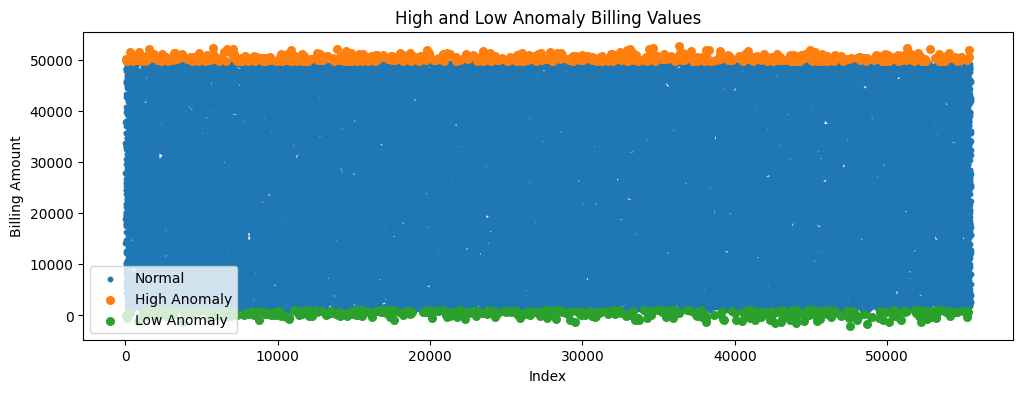

In [45]:
plt.figure(figsize=(12,4))

# normal values
plt.scatter(
    normals.index,
    normals["Billing Amount"],
    label="Normal",
    s=10
)

# high anomalies
plt.scatter(
    high_anomaly.index,
    high_anomaly["Billing Amount"],
    label="High Anomaly",
    s=30
)

# low anomalies
plt.scatter(
    low_anomaly.index,
    low_anomaly["Billing Amount"],
    label="Low Anomaly",
    s=30
)

plt.xlabel("Index")
plt.ylabel("Billing Amount")
plt.title("High and Low Anomaly Billing Values")
plt.legend()
plt.show()

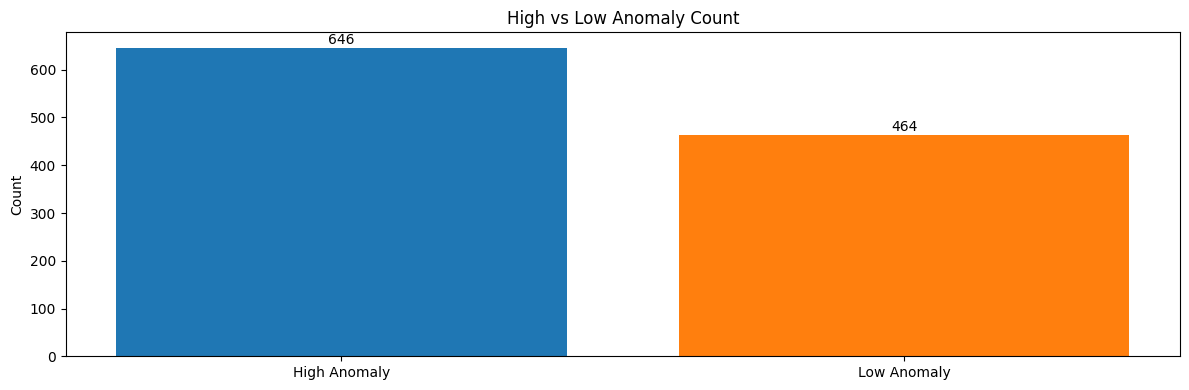

In [46]:
plt.figure(figsize=(12,4))

bars = ["High Anomaly", "Low Anomaly"]
counts = [len(high_anomaly), len(low_anomaly)]

colors = ["#1f77b4", "#ff7f0e"]   # blue and orange

plt.bar(bars, counts, color=colors)

# add count labels above bars
for i, count in enumerate(counts):
    plt.text(i, count + 1, str(count), ha='center', va='bottom', fontsize=10)

plt.ylabel("Count")
plt.title("High vs Low Anomaly Count")
plt.tight_layout()
plt.show()



* **Highly imbalanced dataset (2% anomaly rate)**
| **Category** | **Count** | **Percentage** |
|--------------|-----------|----------------|
| Normal | 54,390 | 98.00% |
| Anomaly | 1,110 | 2.00% |
| **Total** | **55,500** | **100.00%** |

---

* **Random Forest emerged as the optimal model for this healthcare risk prediction task**
| Model                      | Accuracy | Precision | Recall  | F1-score |
|----------------------------|---------:|----------:|--------:|---------:|
| Random Forest              | 0.4100   | 0.4099    | 0.4099  | 0.4098   |
| K-Nearest Neighbors        | 0.3650   | 0.3670    | 0.3647  | 0.3586   |
| XGBoost                    | 0.3638   | 0.3642    | 0.3637  | 0.3637   |
| Support Vector Machine     | 0.3350   | 0.3355    | 0.3343  | 0.3259   |
| Logistic Regression        | 0.3330   | 0.3326    | 0.3324  | 0.3246   |


---


